### Note to the users
#### If you are planning to create your own exploratory examples, please do not modify the original document, but create your personal copy that you can edit.

# Simulation with the reduced Wong-Wang model with Exhitation & Inhibition

Gustavo et al and Hansen et al 2015 used the reduced Wong-Wang model to reproduce certain aspects of human resting state fMRI. This is a 1D model, so we can tune its parameters simply by plotting the derivative as a function of the state variable:

In [2]:
%matplotlib inline
%pylab inline

!pip install tvb-data
!pip install -U tvb-library

from tvb.simulator.lab import *
from matplotlib.pyplot import *
import numpy

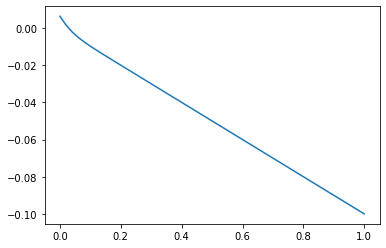

In [2]:
rww = models.ReducedWongWangExcInh()
S = numpy.linspace(0, 1, 50).reshape((1, -1, 1))
C = S * 0.0
dS = rww.dfun(S, C)

figure()
plot(S.flat, dS.flat)

And a short simulation

WARNING  File 'hemispheres' not found in ZIP.


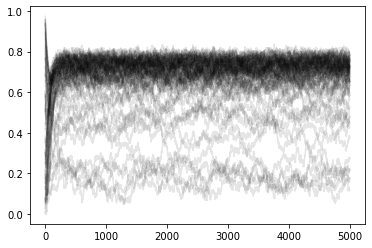

In [3]:
sim = simulator.Simulator(
    model=rww,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.5 / 50.0])),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=numpy.array([1e-5]))), 
    monitors=[monitors.TemporalAverage(period=1.)],
    simulation_length=5e3
).configure()

(time, data), = sim.run()

figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1);

## References

[DPA_2013]     Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, Patric Hagmann and Maurizio Corbetta. Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations. The Journal of Neuroscience 32(27), 11239-11252, 2013.